<a href="https://colab.research.google.com/github/Aishwaryap015/IVP-Notebooks/blob/main/IVP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📸 Image Sampling and Quantization in Python (OpenCV)
**Author:** Aishwarya Priydarshni  
**Date:** 2025-09-04  

This notebook demonstrates:  
1. **Image Sampling** – reducing image resolution  
2. **Image Quantization** – reducing bit depth  
3. **Flexible image input** – built-in image, upload from local system, Google Drive, or URL  

We will observe how these operations affect image quality visually.  

**Goals:**  
- Understand the effect of reducing image resolution (sampling) on details  
- Observe the effect of reducing intensity levels (quantization) on color fidelity  
- Learn different ways to load images in Colab for experimentation


Saving panda.jpeg to panda.jpeg


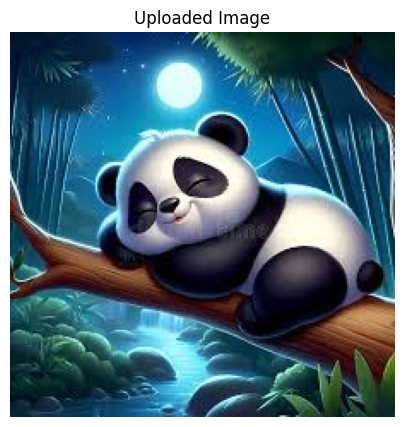

Image Shape: (225, 225, 3), Data Type: uint8


In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Upload image from local system
uploaded = files.upload()  # This will prompt you to select a file
filename = next(iter(uploaded))  # Get the uploaded file name

# Read the uploaded image
img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

print(f"Image Shape: {img.shape}, Data Type: {img.dtype}")


1️⃣ Image Sampling (Resolution Reduction)

Definition: Sampling reduces the spatial resolution of an image by decreasing the number of pixels.

Effects:

    High-resolution → low-resolution
    Image becomes blocky or loses details
    Often used for faster processing or compression

We will downsample the image by factors of 2 and 4 to visualize the effect.

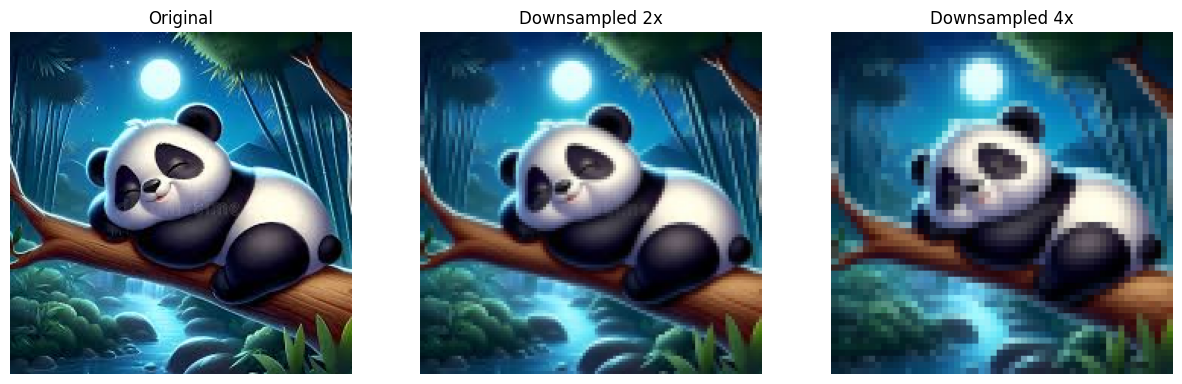

In [ ]:
# --------------------- Sampling Function ---------------------
def downsample_image(image, factor):
    height, width = image.shape[:2]
    # Resize down
    small = cv2.resize(image, (width//factor, height//factor), interpolation=cv2.INTER_AREA)
    # Resize back to original size for display
    restored = cv2.resize(small, (width, height), interpolation=cv2.INTER_NEAREST)
    return restored

# Downsample by 2x and 4x
sampled_2x = downsample_image(img, 2)
sampled_4x = downsample_image(img, 4)

# Display
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sampled_2x)
plt.title("Downsampled 2x")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sampled_4x)
plt.title("Downsampled 4x")
plt.axis('off')

plt.show()


## 2️⃣ Image Quantization (Bit Depth Reduction)

**Definition:** Reduces the number of intensity levels in the image.  

**Effects:**  
- 8-bit → 256 levels (original)  
- 4-bit → 16 levels  
- 2-bit → 4 levels  
- 1-bit → 2 levels  
- Lower bit depth → visible banding (posterization)


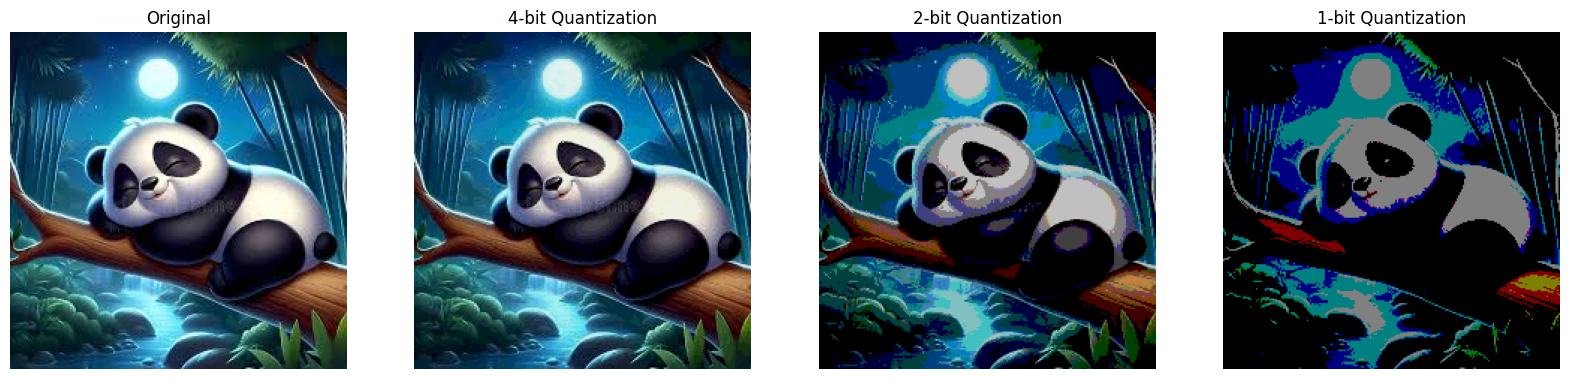

In [ ]:
# --------------------- Quantization Function ---------------------
def quantize_image(image, bits):
    levels = 2**bits
    image_quant = np.floor(image / 256 * levels) * (256/levels)
    return np.uint8(image_quant)

# Apply quantization
quant_4bit = quantize_image(img, 4)
quant_2bit = quantize_image(img, 2)
quant_1bit = quantize_image(img, 1)

# Display
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(quant_4bit)
plt.title("4-bit Quantization")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(quant_2bit)
plt.title("2-bit Quantization")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(quant_1bit)
plt.title("1-bit Quantization")
plt.axis('off')

plt.show()


## ✅ Summary

- **Sampling:** Reduces resolution → image becomes smaller or blocky  
- **Quantization:** Reduces bit depth → visible banding, fewer intensity levels  
- **Observation:** Both operations affect visual quality in different ways  
- Uploaded image is processed **from local system**, but other input methods are also possible.


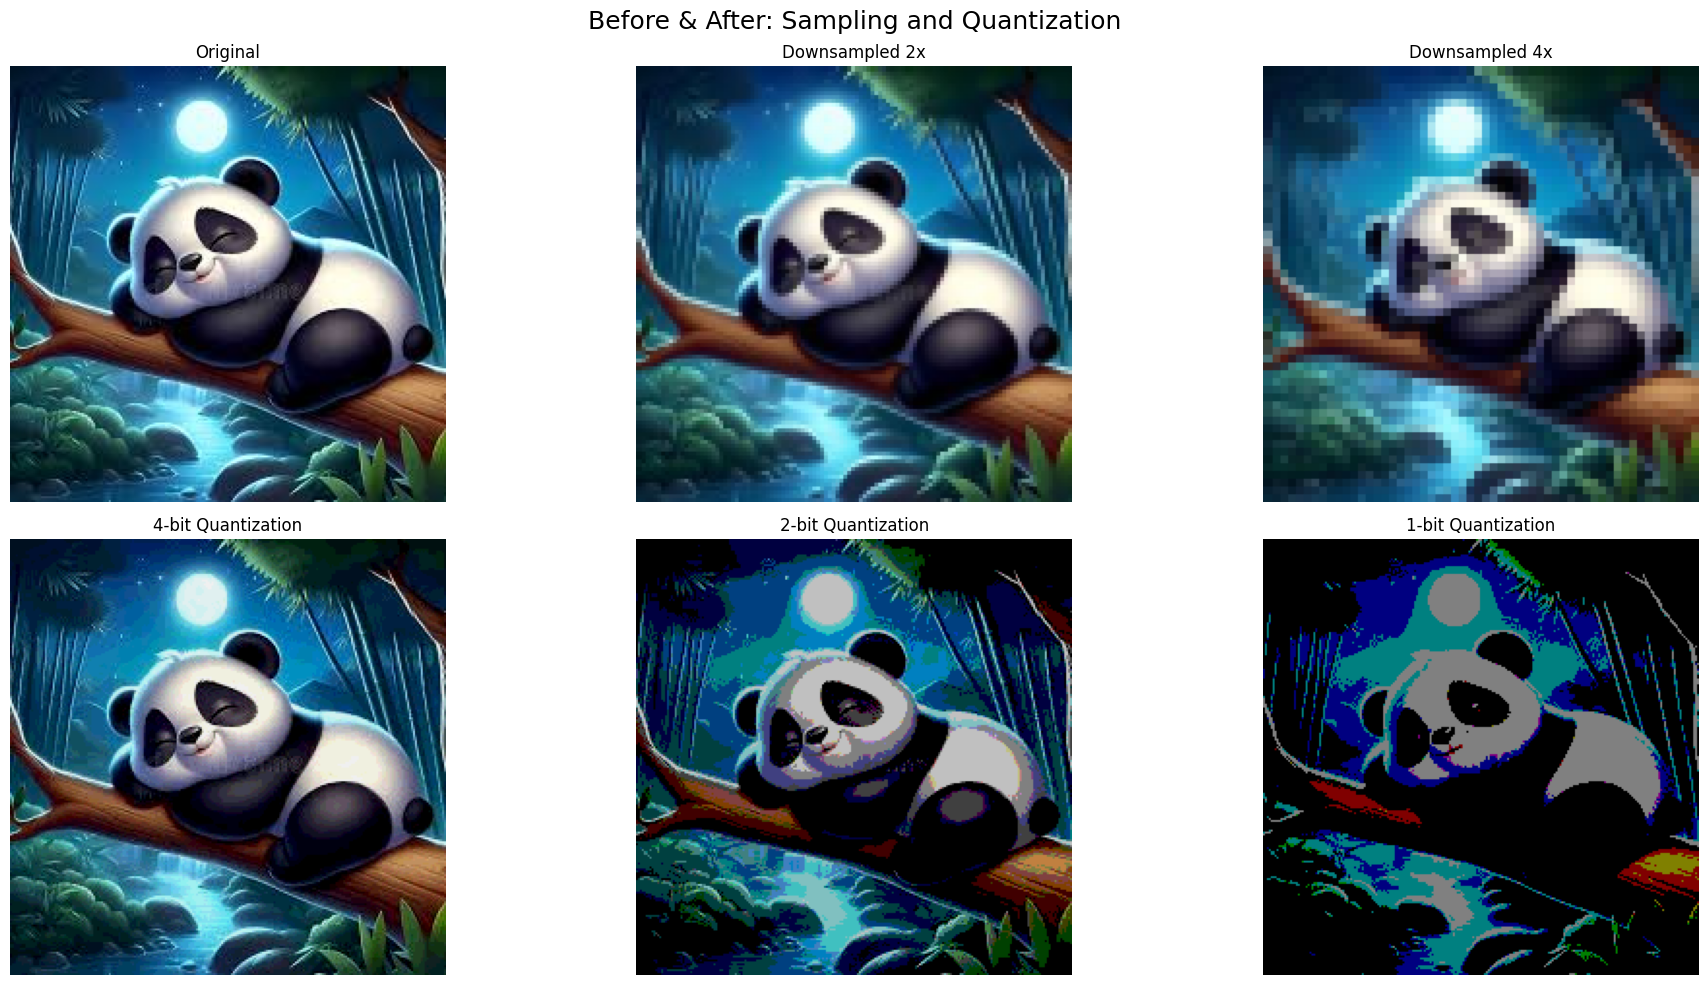

In [ ]:
# --------------------- Combined Before & After View ---------------------
plt.figure(figsize=(20,10))

# Original
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Sampling 2x
plt.subplot(2,3,2)
plt.imshow(sampled_2x)
plt.title("Downsampled 2x")
plt.axis('off')

# Sampling 4x
plt.subplot(2,3,3)
plt.imshow(sampled_4x)
plt.title("Downsampled 4x")
plt.axis('off')

# Quantization 4-bit
plt.subplot(2,3,4)
plt.imshow(quant_4bit)
plt.title("4-bit Quantization")
plt.axis('off')

# Quantization 2-bit
plt.subplot(2,3,5)
plt.imshow(quant_2bit)
plt.title("2-bit Quantization")
plt.axis('off')

# Quantization 1-bit
plt.subplot(2,3,6)
plt.imshow(quant_1bit)
plt.title("1-bit Quantization")
plt.axis('off')

plt.suptitle("Before & After: Sampling and Quantization", fontsize=18)
plt.tight_layout()
plt.show()
